### **Desafío - Estimando curvas de densidad de probabilidad**

#### **`Requerimiento 1: Importar un csv`**


- Importar el set de datos creados por usted al final de la sesión pasada

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
plt.style.use('seaborn-whitegrid') # Gráficos estilo Seaborn
plt.rcParams["figure.figsize"] = (10,6) # Tamaño de los gráficos
plt.rcParams['figure.dpi'] = 200 # Resolución Gráficos

In [2]:
df = pd.read_csv('./subsample_AATPL_demo.csv')
df

,Unnamed: 0,cname,undp_hdi,ccodealp,ht_region,gle_cgdpc,imf_pop,wef_imort,who_alc2000,who_tobt,wdi_exph
0,37,Taiwan,NaN,TWN,EastAsia,33965.8710,23.434000,3.934564,NaN,NaN,NaN
1,27,Belarus,0.798,BLR,EastEurope,17780.6410,9.468000,NaN,13.94,27.900000,5.687722
2,114,Montenegro,0.804,MNE,EastEurope,14538.5200,0.622000,5.500000,6.56,NaN,6.416543
3,112,Mongolia,0.733,MNG,EastAsia,6277.8999,2.882000,23.000000,NaN,26.799999,4.730342
4,59,France (1963-),0.894,FRA,WesternDem,34007.8980,64.028000,3.400000,11.50,28.100000,11.539519
...,...,...,...,...,...,...,...,...,...,...,...
92,156,Slovakia,0.842,SVK,EastEurope,21776.3400,5.416000,6.300000,10.60,28.799999,8.054048
93,36,China,0.734,CHN,EastAsia,9283.3799,NaN,12.100000,5.78,25.900000,5.548228
94,157,Vietnam,0.678,VNM,SouthEastAsia,4147.5698,89.691002,18.400000,4.09,23.700001,7.066778
95,29,Cameroon,0.514,CMR,SubSaharian,2658.5100,NaN,61.099998,6.19,18.799999,4.103672


In [3]:
df_new = df.iloc[:, 1:]
df_new

,cname,undp_hdi,ccodealp,ht_region,gle_cgdpc,imf_pop,wef_imort,who_alc2000,who_tobt,wdi_exph
0,Taiwan,NaN,TWN,EastAsia,33965.8710,23.434000,3.934564,NaN,NaN,NaN
1,Belarus,0.798,BLR,EastEurope,17780.6410,9.468000,NaN,13.94,27.900000,5.687722
2,Montenegro,0.804,MNE,EastEurope,14538.5200,0.622000,5.500000,6.56,NaN,6.416543
3,Mongolia,0.733,MNG,EastAsia,6277.8999,2.882000,23.000000,NaN,26.799999,4.730342
4,France (1963-),0.894,FRA,WesternDem,34007.8980,64.028000,3.400000,11.50,28.100000,11.539519
...,...,...,...,...,...,...,...,...,...,...
92,Slovakia,0.842,SVK,EastEurope,21776.3400,5.416000,6.300000,10.60,28.799999,8.054048
93,China,0.734,CHN,EastAsia,9283.3799,NaN,12.100000,5.78,25.900000,5.548228
94,Vietnam,0.678,VNM,SouthEastAsia,4147.5698,89.691002,18.400000,4.09,23.700001,7.066778
95,Cameroon,0.514,CMR,SubSaharian,2658.5100,NaN,61.099998,6.19,18.799999,4.103672


In [4]:
df_new.dtypes

cname           object
undp_hdi       float64
ccodealp        object
ht_region       object
gle_cgdpc      float64
imf_pop        float64
wef_imort      float64
who_alc2000    float64
who_tobt       float64
wdi_exph       float64
dtype: object

In [5]:
df_new.columns

Index(['cname', 'undp_hdi', 'ccodealp', 'ht_region', 'gle_cgdpc', 'imf_pop',
       'wef_imort', 'who_alc2000', 'who_tobt', 'wdi_exph'],
      dtype='object')

#### **`Requerimiento 2: Importar su conjunto de funciones`**

- Para ello deberás:
    - Generar un archivo **ancilliary_funcs.py** para guardar las funciones creadas en la sesión pasada e importe.
    - Utilizar las funciones creadas para inspeccionar la cantidad de casos perdidos de la muestra importada.

In [6]:
from ancilliary_funcs import get_descriptives
from ancilliary_funcs import get_null_cases
from ancilliary_funcs import calidad_datos
from ancilliary_funcs import dotplot

In [7]:
for c in df_new.columns:
    get_null_cases(df, c, print_list=True)
    print('-'*100)

Casos nulos para cname: 0
Porcentaje nulos para cname: 0.0
----------------------------------------------------------------------------------------------------
Taiwan
Korea, North
San Marino
Monaco
Marshall Islands
Casos nulos para undp_hdi: 5
Porcentaje nulos para undp_hdi: 0.05154639175257732
----------------------------------------------------------------------------------------------------
Casos nulos para ccodealp: 0
Porcentaje nulos para ccodealp: 0.0
----------------------------------------------------------------------------------------------------
Casos nulos para ht_region: 0
Porcentaje nulos para ht_region: 0.0
----------------------------------------------------------------------------------------------------
Casos nulos para gle_cgdpc: 0
Porcentaje nulos para gle_cgdpc: 0.0
----------------------------------------------------------------------------------------------------
Korea, North
Liechtenstein
Cuba
Turkmenistan
Guinea-Bissau
Costa Rica
Central African Republic
Niger


In [8]:
calidad_datos(df_new).loc[:,['nulos','porc_nulos']].sort_values('porc_nulos', ascending=False)

,nulos,porc_nulos
who_tobt,30,0.309278
imf_pop,22,0.226804
wef_imort,21,0.216495
who_alc2000,7,0.072165
undp_hdi,5,0.051546
wdi_exph,3,0.030928
gle_cgdpc,0,0.000000
cname,0,0.000000
ccodealp,0,0.000000
ht_region,0,0.000000


#### **`Requerimiento 3: Estimar el puntaje Z de una variable`**

- Se debe utilizar la que posea la menor cantidad de datos perdidos (o que no posea).
    - Generar una nueva columna en la tabla de datos que contenga el puntaje Z de dicha variable. Recuerde que para calcular el puntaje z de una observación se utiliza la fórmula:
    $$
    \begin{align}
    z_i = (x_i - \bar X / \sigma)
    \end{align}
    $$
    - Para ordenar los valores pueden utilizar la función **`sort_values()`** del DataFrame analizado. Lean la documentación asociada al argumento **by**.
    - Asegúrense de eliminar las observaciones que tengan valores perdidos con **`dropna()`**. Lean la documentación asociada al argumento **`subset`**.
    - Seleccionen las primeras y últimas 10 observaciones de la base reordenada.

- ¿Qué características en común se encuentran?

Esta función me permite calcular el puntaje Z de cualquier columna

In [9]:
def get_zscore(col, case):
    get_point = df[df['cname']==case][col]
    preproc=df[col].dropna()
    get_mean = preproc.mean()
    get_std = np.sqrt(preproc.var())
    return (get_point - get_mean)/get_std

Probando para la columna escogida con dos paises especificos

In [10]:
get_zscore('gle_cgdpc', 'Niger')

23   -0.742089
Name: gle_cgdpc, dtype: float64

In [11]:
get_zscore('gle_cgdpc', 'Liberia')

31   -0.74928
Name: gle_cgdpc, dtype: float64

Eliminamos los datos nulos de la columna gle_cgdpc

In [12]:
df_dropna = df_new.dropna(subset = ['gle_cgdpc'])  

Creamos la columna con valores Z

In [13]:
media = df_dropna['gle_cgdpc'].mean()    #Obtenemos la media de la variable
desv = df_dropna['gle_cgdpc'].std()      #Obtenemos la desviacion estandard de la variable

In [14]:
df_dropna['z_gle_cgdpc'] = ((df_dropna['gle_cgdpc'] - media) / desv)  #Creamos puntaje z

df_dropna = df_dropna.sort_values(by=['z_gle_cgdpc'], ascending=True)

In [15]:
df_dropna

,cname,undp_hdi,ccodealp,ht_region,gle_cgdpc,imf_pop,wef_imort,who_alc2000,who_tobt,wdi_exph,z_gle_cgdpc
31,Liberia,0.427,LBR,SubSaharian,488.26999,NaN,53.599998,3.72,14.200000,10.036333,-0.749280
23,Niger,0.351,NER,SubSaharian,644.53998,NaN,NaN,0.15,8.400000,5.821299,-0.742089
22,Central African Republic,0.347,CAF,SubSaharian,690.03998,NaN,NaN,1.66,NaN,4.200222,-0.739995
62,Madagascar,0.511,MDG,SubSaharian,822.62000,NaN,40.900002,0.87,NaN,3.041355,-0.733894
69,Mozambique,0.414,MOZ,SubSaharian,852.39001,25.733,63.099998,1.16,18.799999,6.975582,-0.732524
...,...,...,...,...,...,...,...,...,...,...,...
67,Norway,0.948,NOR,WesternDem,57634.77000,5.156,2.200000,6.06,24.100000,9.719718,1.880475
60,Luxembourg,0.896,LUX,WesternDem,61404.48000,0.550,1.700000,11.12,24.400000,6.937873,2.053949
7,Liechtenstein,0.911,LIE,WesternDem,102243.52000,NaN,NaN,NaN,NaN,NaN,3.933271
24,Qatar,0.855,QAT,NorthAfrica,104049.44000,2.045,6.300000,1.15,NaN,2.187062,4.016375


Utiliza esta celda para seleccionar y mostrar las primeras 10 observaciones

In [16]:
df_dropna.head(10)

,cname,undp_hdi,ccodealp,ht_region,gle_cgdpc,imf_pop,wef_imort,who_alc2000,who_tobt,wdi_exph,z_gle_cgdpc
31,Liberia,0.427,LBR,SubSaharian,488.26999,NaN,53.599998,3.72,14.200000,10.036333,-0.749280
23,Niger,0.351,NER,SubSaharian,644.53998,NaN,NaN,0.15,8.400000,5.821299,-0.742089
22,Central African Republic,0.347,CAF,SubSaharian,690.03998,NaN,NaN,1.66,NaN,4.200222,-0.739995
62,Madagascar,0.511,MDG,SubSaharian,822.62000,NaN,40.900002,0.87,NaN,3.041355,-0.733894
69,Mozambique,0.414,MOZ,SubSaharian,852.39001,25.733,63.099998,1.16,18.799999,6.975582,-0.732524
84,Ethiopia (1993-),0.441,ETH,SubSaharian,900.77002,88.347,46.500000,1.86,4.700000,4.884313,-0.730298
17,Guinea-Bissau,0.421,GNB,SubSaharian,961.26001,NaN,NaN,3.57,NaN,5.593137,-0.727514
87,Sierra Leone,0.431,SLE,SubSaharian,979.95001,6.232,117.400002,3.78,34.400002,11.089902,-0.726654
5,Guinea,0.414,GIN,SubSaharian,993.83002,11.745,65.199997,0.22,NaN,5.644798,-0.726015
20,Mali,0.438,MLI,SubSaharian,1063.26000,14.854,79.599998,0.61,18.600000,6.862166,-0.722820


Utiliza esta celda para seleccionar y mostrar las últimas 10 observaciones

In [17]:
df_dropna.tail(10)

,cname,undp_hdi,ccodealp,ht_region,gle_cgdpc,imf_pop,wef_imort,who_alc2000,who_tobt,wdi_exph,z_gle_cgdpc
63,Netherlands,0.923,NLD,WesternDem,42258.352,16.865000,3.4,8.68,25.700001,10.897293,1.172886
12,San Marino,NaN,SMR,WesternDem,42664.211,0.034000,NaN,NaN,NaN,6.129065,1.191563
35,Ireland,0.920,IRL,WesternDem,46422.070,4.621000,3.4,10.75,23.200001,7.783196,1.364492
14,United States,0.918,USA,WesternDem,47769.699,318.789001,6.0,8.82,18.100000,17.140755,1.426506
80,Singapore,0.924,SGP,SouthEastAsia,54268.148,5.470000,2.3,1.83,16.200001,4.922792,1.725551
67,Norway,0.948,NOR,WesternDem,57634.770,5.156000,2.2,6.06,24.100000,9.719718,1.880475
60,Luxembourg,0.896,LUX,WesternDem,61404.480,0.550000,1.7,11.12,24.400000,6.937873,2.053949
7,Liechtenstein,0.911,LIE,WesternDem,102243.520,NaN,NaN,NaN,NaN,NaN,3.933271
24,Qatar,0.855,QAT,NorthAfrica,104049.440,2.045000,6.3,1.15,NaN,2.187062,4.016375
53,Monaco,NaN,MCO,WesternDem,108481.130,NaN,NaN,NaN,NaN,4.337683,4.220312


#### **`Requerimiento 4: Estimar el puntaje Z de las regiones`**

- Utilizando el resultado anterior, visualice su nueva variable estandarizada (es decir, luego de calcular el puntaje Z).
    - Para ello realice un **`dotplot`** que muestre el valor promedio de su variable por cada región.
    - Agregue además una línea que muestre el promedio total de la variable (es decir, antes de agrupar).

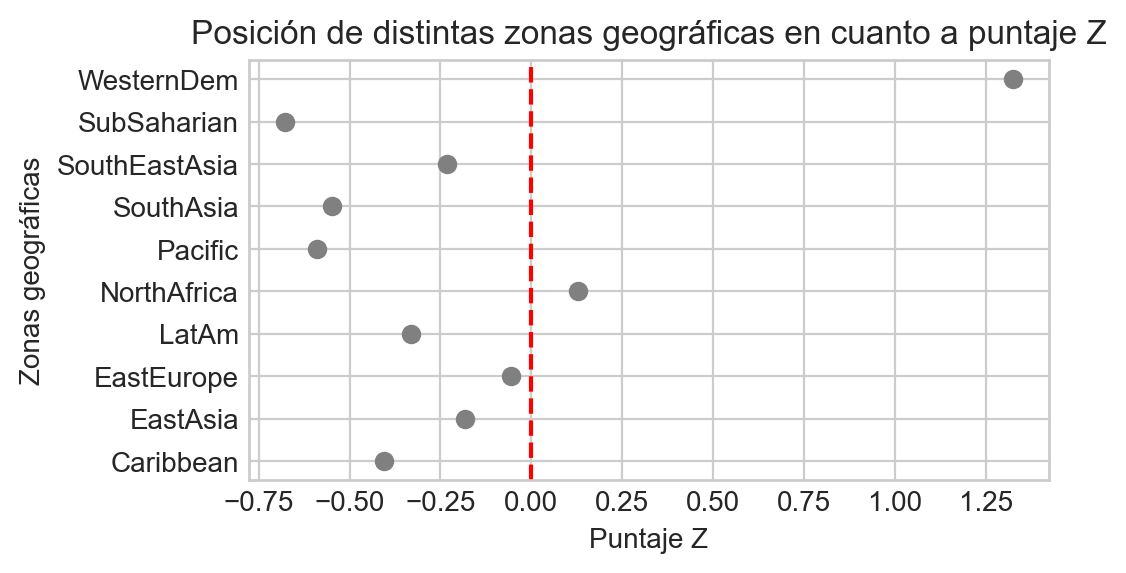

In [18]:
plt.subplots_adjust(left=0.2,
                    bottom=0.1, # El largo del grafico
                    right=0.6, # El ancho del grafico
                    top=0.45) # El largo del grafico

plt.title('Posición de distintas zonas geográficas en cuanto a puntaje Z')
plt.xlabel('Puntaje Z')
plt.ylabel('Zonas geográficas')
dotplot(df_dropna, plot_var='z_gle_cgdpc', plot_by='ht_region', statistic = 'mean')

#### **`Requerimiento 5: Generar curvas de densidad de probabilidad`**

- Cree una función que permita visualizar las curvas de Densidad de Probabilidad para las variables `imf_pop`, `gle_cgdpc` y `wdi_exph`.
- La función debe contener como argumentos:
    - `df`: Tabla de datos 1.
    - `variable`: Variable a contrastar.

In [99]:
# Utiliza esta celda para definir la función solicitada
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

def densidad_prob(df, variable):
    plt.hist(df[variable], density=True, alpha=0.5, bins=10)
    # Extraemos los límites del eje x del histograma
    x_min, x_max = plt.xlim()

    # Utilizandos los límites del histograma para crear un arreglo (lista) de 100 valores entre los valores obtenidos previamente
    x_axis = np.linspace(x_min, x_max, 100)

    # Graficamos la curva de densidad empirica (la que tienen los datos), que permite comparar directamente con la curva de densidad teorica (la que tiene en este caso la distribución normal)
    gauss_kde = stats.gaussian_kde(df[variable].dropna())  # Kernel gaussiano                              
    Z = np.reshape(gauss_kde(x_axis).T, x_axis.shape)   # Reshape permite cambiar las dimensiones de una matriz reordenando sus elemento
        
    plt.plot(x_axis, Z, color='blue', lw=2, label="Densidad empírica de los datos")  # Curva de densidad empírica   
    
    dist = stats.norm(loc=np.mean(df[variable]), scale=np.std(df[variable]))                                      
    x = np.linspace(dist.ppf(0.001),dist.ppf(0.999), 100)
    plt.plot(x, dist.pdf(x), "r-", label="Densidad teórica")   #Curva de densidad teórica

    plt.xlabel(f'Valores de la variable {variable}')
    plt.ylabel('Frecuencia observada')
    plt.title(f'Histograma {variable}')
    plt.legend(prop={'size': 7.5})

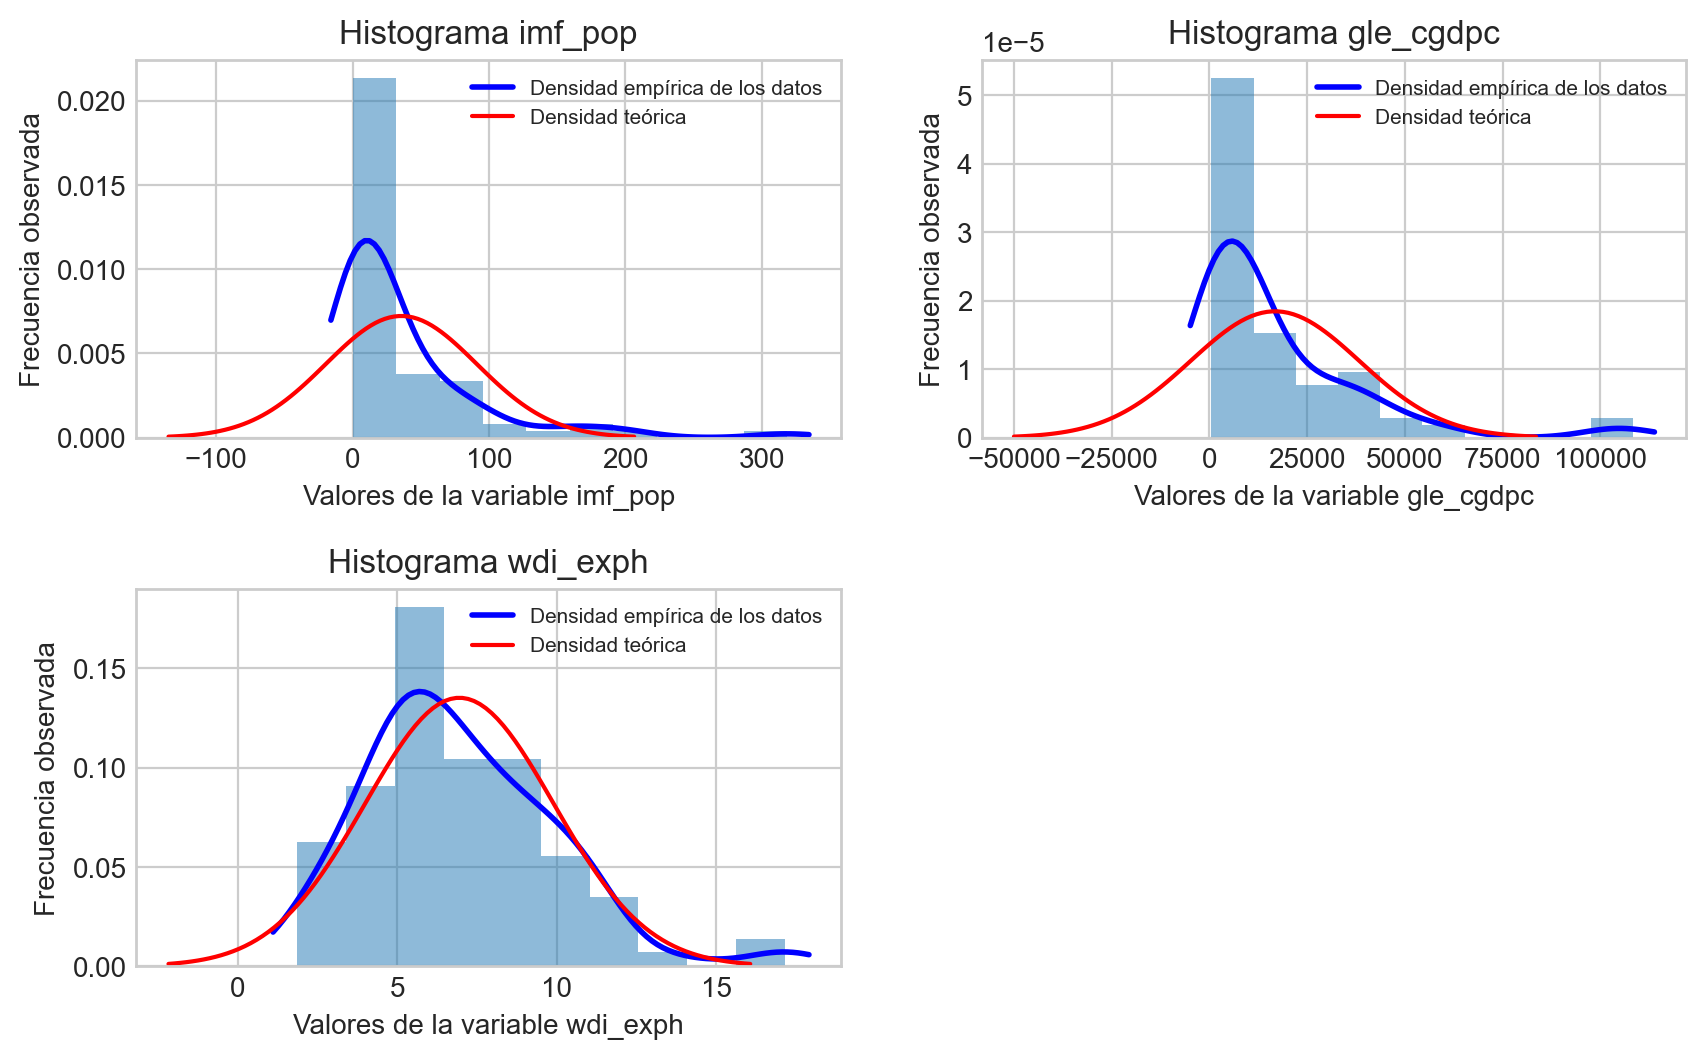

In [103]:
variables_solicitadas = ['imf_pop','gle_cgdpc','wdi_exph']

j = 1
for var in variables_solicitadas:
    plt.subplot(2, 2, j) 
    plt.subplots_adjust(hspace=0.4)
    densidad_prob(df_dropna, var)
    print("")
    j += 1